In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

bmi_data = pd.read_csv("bmi/ehresp_2014.csv")

In [2]:
bmi_data.head()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


In [3]:
bmi_data = bmi_data[bmi_data['erbmi']>0]
bmi_data.shape

(10637, 37)

In [14]:
train = bmi_data[['tulineno','erhhch','ertpreat','ethgt','etwgt','exincome1','euwgt']]
print(train.shape)
test = bmi_data[['erbmi']]

(10637, 7)


In [5]:
X = bmi_data[[ 'euwgt', 'euhgt' ]]
y = bmi_data['erbmi']
# fit a glm model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
y_pred = reg.predict(X)
print(y_pred)

[ 32.4644093   23.26023382  46.59936587 ...,  22.07374319  22.78766571
  22.60791749]


In [7]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, y_pred))

0.624214994868


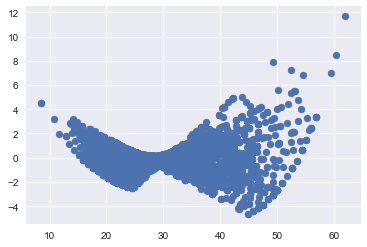

In [8]:
residual = y - y_pred
plt.scatter(y_pred,residual)

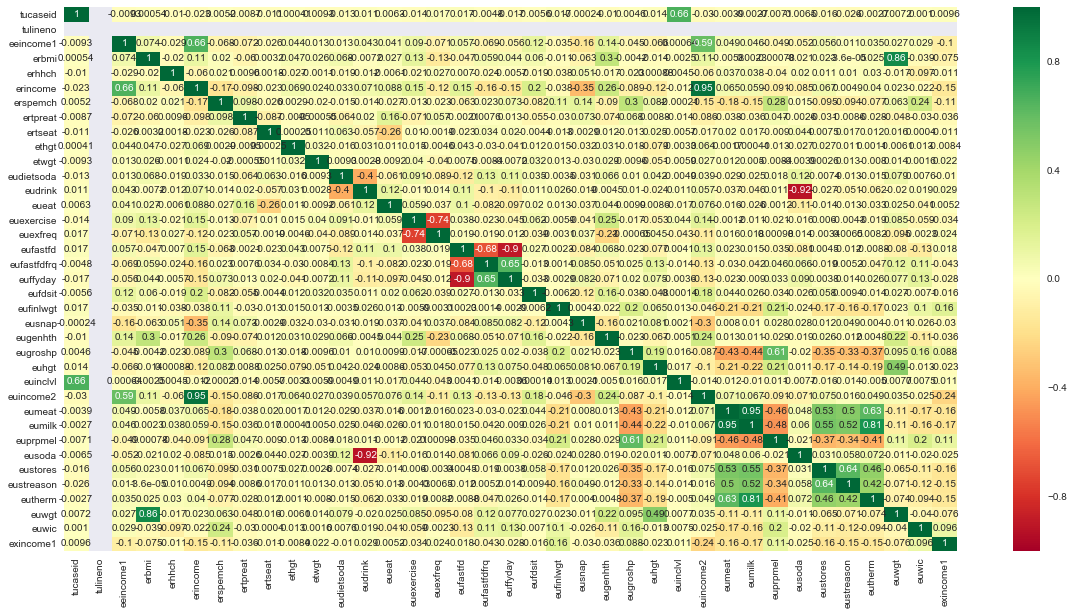

In [9]:
temp = bmi_data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(temp, cmap='RdYlGn', annot=True)
plt.show()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_) 

[ 0.99344395  0.00655605]


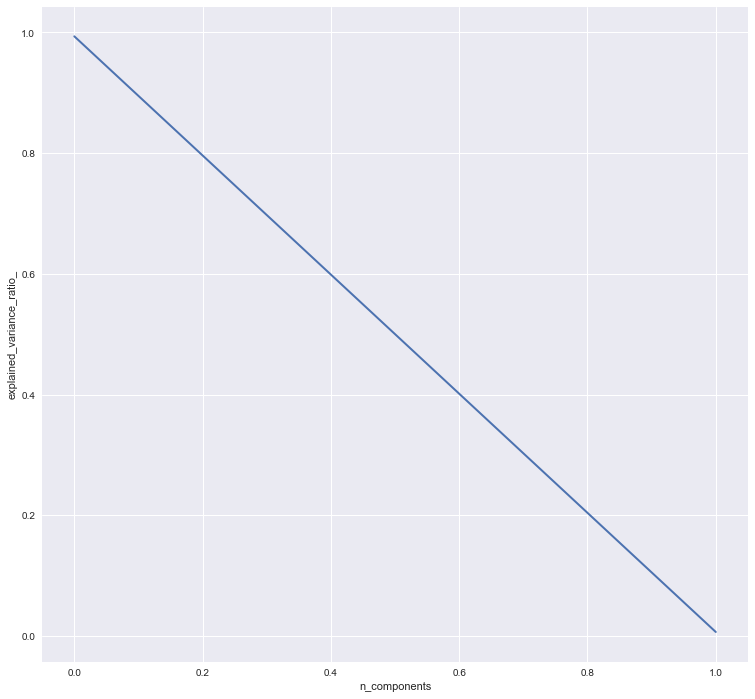

In [11]:
plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

In [12]:
print(train.head())

   tulineno  erhhch  ertpreat  ethgt  etwgt  exincome1  euwgt
0         1       1        30      0      0          2    170
1         1       3        45      0      0          0    128
2         1       3        60      0      0         12    270
4         1       3        65      0      0          0    210
5         1       3        20      0      0          0    220


In [15]:
from sklearn.model_selection import train_test_split

# split data train 70 % and test 30 %
x_train, y_train, x_test, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((7445, 7), (7445, 1), (3192, 7), (3192, 1))


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
# find best scored 5 features
select_feature = SelectKBest(f_regression, k=5).fit(x_train, x_test)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)


('Score list:', array([             nan,   7.38122088e-01,   2.92826897e+01,
         1.07626077e+01,   1.74307165e+00,   4.14322088e+01,
         2.09124623e+04]))
('Feature list:', Index([u'tulineno', u'erhhch', u'ertpreat', u'ethgt', u'etwgt', u'exincome1',
       u'euwgt'],
      dtype='object'))


/Users/mohitsharma/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mohitsharma/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in divide
  corr /= row_norms(X.T)
/Users/mohitsharma/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mohitsharma/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mohitsharma/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond